# Two Problems in Time-Reversal Symmetry in Space-time

In this notebook, I hope to address two different problems with time-reversal symmetry in space-time. The first has to do with thermodynamics. It was noticed long ago (I believe by Boltzman himself) that time-reversal appeared to be so perfect that the time asymmetry of the laws of thermodynamics had to be sprinkled in by hand. Once done, things proceeded naturally. The first step however has long bothered people who consider the foundational issues.

The second time-reversal issues is about the three forces in the standard model: electromagnetism, the weak force, and the strong force. As field equations, they appear oblivious to the direction of time. If the fundamental forces of Nature don't care about the arrow of time, why is it so obvious to us?

A guiding constraint of my work is that laws of physics need to be written in a reversible way. The way I interpret that in practice is that my math tools must also be reversible. I choose to constrain myself to using quaternions and quaternion series. I prefer to call these space-time numbers and space-time number series as that reflects more accurately what they do (a quaternion is 4 Roman soldiers, so quite old school).

Load the needed libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

## Space-time number time-reversal operators

The standard way to do time reversal is to treat an event in space-time as a 4-vector and operate on that 4-vector with a member of the Lorentz group, diagonal(-1, 1, 1, 1).

In [2]:
# Symbolic manipulation
t, x, y, z = sp.symbols("t x y z")
v_txyz = sp.Matrix([t, x, y, z])
m_time_reversal = sp.diag(-1, 1, 1, 1)
print(f"v_txyz\n{v_txyz}")
print()
print(f"Time reversal matrix\n{m_time_reversal}")
print()
rev_txyz = m_time_reversal * v_txyz
print(f"v_txyz reversed\n{rev_txyz}")

v_txyz
Matrix([[t], [x], [y], [z]])

Time reversal matrix
Matrix([[-1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

v_txyz reversed
Matrix([[-t], [x], [y], [z]])


It will come as no surprise that one can return to the same place using the same element of the Lorentz group:

In [3]:
rev_txyz = m_time_reversal * rev_txyz
print(f"rev_txyz reversed\n{rev_txyz}")

rev_txyz reversed
Matrix([[t], [x], [y], [z]])


This process can be repeated indefinitely with the same results every time.

I chose not to call a space-time number a 4-vector as I believe it is an inaccurate label. I prefer to call it a 3-vector-scalar. The label "4-vector" suggests that all parts of similar which is not the case. A 4-vector is defined as something that can be added to another 4-vector and multiplied by a scalar to create a new 4-vector. Mathematicians are free to define things as they wish. Mathematical physicists are more constrained. It is valid to add two space-time numbers to create a third. The problem comes with scalars of the form $(t, 0, 0, 0)$. These certainly exist, but only for particular reference frames. There will be other reference frames where a scalar is no longer a scalar. One can multiply 3-vector-scalars by 3-vector-scalars which in some reference frames has a zero 3-vector. Including the capacity to multiply 3-vector-scalars together is huge. There are too many consequences to enumerate. One is simply the ability to use algebra to solve problems like time-reversal of a space-time number:

$$L \;(t, x, y, z) = (-t, x, y, z)$$
$$L = (-t, x, y, z)\;(t, x, y, z)^{-1}$$

A physicist friend thought such an answer was shallow. I think it is an equal mystery why multiplying a 4-vector by an element of the Lorentz group is something Nature knows how to do with ease. Since I want a local result meaning it depends on the values $(t, x, y, z)$ and space-time numbers are a group under multiplication modulo zero, the space-time number _L_ is the way to do it. For every point in space-time, one needs a different _L_. That too is the nature of a local solution. It is also an unfamiliar approach as no power is given to 4-vectors.

Show that _L_ does its assigned task.

q_txyz
(t, x, y, z) 

q_rev
(-t, x, y, z) 

L


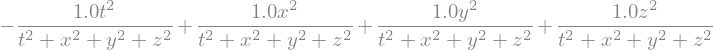

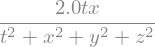

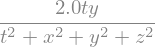

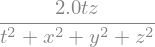

Lq
(-1.0*t, 1.0*x, 1.0*y, 1.0*z) 



In [8]:
q_txyz = Q([t, x, y, z])
q_rev = flip_sign(conj(q_txyz))
L = product(q_rev, inverse(q_txyz))
Lq = product(L, q_txyz)
q_txyz.print_state("q_txyz")
q_rev.print_state("q_rev")
L.display("L")
Lq.simplify().print_state("Lq")

It should be noted that the combination of functions, flip_sign(conq()) will do exactly the same thing as diagonal(-1, 1, 1, 1). Those are both well-defined space-time number functions that don't need some additional algebraic structure to do the task at hand.

The space-time number _L_ is a local time-reversal operator. What makes it local is that the values depend explicitly on the numbers put in. The two most important theories in physics, the standard model and general relativity, are local theories, not global. That makes _L_ worth investigating. Apply _L_ to the reverse space-time number.

L rev


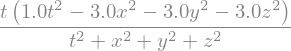

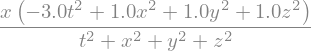

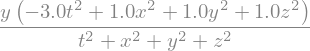

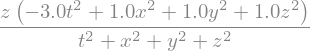

In [9]:
Lrev = product(L, q_rev)
Lrev.simplify().display("L rev")

Applying the same transformation twice in a row does not return to the starting spot. In math jargon, it is not an involution like a conjugate operator is. The Lorentz matrix diag(-1, 1, 1, 1) is an involution. What does it take to "fix" this problem? Not much, just the conjugate of _L_.

In [10]:
Lconjrev = product(conj(L), q_rev)
Lconjrev.simplify().print_state("L* rev")

L* rev
(1.0*t, 1.0*x, 1.0*y, 1.0*z) 



It is a good practice for me to do things in notebooks as I get to see new patterns. For example, this should be true:

$$L^* L L^* L q = q$$

This could only be the case if $L^* L = 1$. Test it.

In [11]:
LcL = product(conj(L), L)
LcL.simplify().print_state("L* L")

L* L
(1.00000000000000, 0, 0, 0) 



The point of this exercise is to say: $L^n q \ne q$ and $(L L^*)^n q = q$. In the domain of classical physics, the changes in time vastly exceed those for changes in space. Look what happens to L as time goes to infinity.

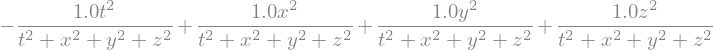

In [12]:
L.t

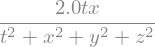

In [13]:
L.x

Sympy did not evaluate this, but we can by eye: the limit as _t_ goes to infinity is $(-1, 0, 0, 0)$. In the limit, $L = L^*$ because the conjugate changes the sign of the zero 3-vector. Classical physics is not this limit physics. Instead, there may way be 10 or twelve zeros in a row between the -1 and non-zero _x, y, z_. At that level, $L \ne L^*$. It is the handedness of the cross product that makes this so.

I have not invested effort in connecting this observation to calculations in thermodynamics.

## Time asymmetry in electromagnetism

In the literature, there are papers that show how to derive the Maxwell equations using complex-valued or biquaternions. There is nothing wrong with such research efforts per se. Since complex-valued quaternions are not a division algebra, it goes against my principle of using only reversible math operators.

In a different notebook, a way to [derive the Maxwell equations](http://bit.ly/Maxwell_derivation) using real-valued space-time number potentials and operators is shown. If the reader doesn't recall the process in detail, a key juncture is to get to this Lorentz invariant quantity, the difference between the squares of the two field:

$$(B^2 - E^2)$$

This gets plugged into the Euler-Lagrange equations and the result is the Gauss's and Ampere's laws. Because the magnetic and electric fields are considered 3-vectors, one needs to introduce a bit of tensor algebra. Just like I have made a choice to consider a scalar to be really a 3-vector-scalar, in the name of consistency I need to view the magnetic and electric fields the same way, $(0, B_x, B_y, B_z)$ and $(0, E_x, E_y, E_z)$. Now that algebra is allowed, the difference of squares is the result of a sum and a difference.

$$(0, B - E)(0, -B - E) = (B^2 - E^2, 2 E \times B)$$

If on the steps forward to the Maxwell equations, one needs to start with the difference of squares, then necessarily it is the case that changing signs of space or time will make a difference. That is not the case with the other three terms that are known as the Poynting vector. It is a measure of energy flux through an electromagnetic field. The resolution of the riddle is with Maxwell's neighbor, the Poynting vector. For whatever historical and cultural reasons, the Maxwell equations have been viewed as being disconneccted from the Poynting vector. A complete understanding of EM requires this 3-vector-scalar marriage. Once this marriage is recognized by the physics community, then the issue of asymmetry is easy to understand: it lives with the respective Poynting vector for fundamental forces, not with the fundamental forces themselves.